**План исследования:**

   1. Загрузка и ознакомление с данными,
   2. Предварительная обработка,
   3. Полноценный разведочный анализ,
   4. Разработка новых синтетических признаков,
   5. Проверка на мультиколлинеарность,
   6. Отбор финального набора обучающих признаков,
   7. Выбор и обучение моделей,
   8. Итоговая оценка качества предсказания лучшей модели,
   9. Анализ важности ее признаков.
   
**Дополнительное задание:**

   1. Для тех, кому этого покажется мало у нас есть дополнительное задание — создать web-приложения прототип вашей модели, используя библиотеку Streamlit.
   2. Подготовка отчета по исследованию. Если останется время можно подготовить полноценный отчет по исследовательской работе Дата Сайнтиста. Примеры хороших отчетов можно посмотреть на сайте Stanford University - отчеты по финальным проектам направления Machine Learning - https://cs229.stanford.edu/projects2014.html. Из примеров понятно наполнение отчета по исследованию, а так же, что главное - понятна сама структура отчета. В реальной работе именно такой формат отчета обычно завершает исследование.

**Описание Датасета**

- **Date**: Год выпуска автомобиля.
- **Make**: Марка автомобиля.
- **Model**: издание автомобиля определенной марки.
- **Trim**: Уровни отделки салона автомобиля — это просто разные версии модели.
- **Body**: Тип кузова транспортного средства относится к форме и модели конкретной марки автомобиля.
- **Transmission**: механизм, который передает мощность от двигателя к колесам.
- **VIN**: идентификационный номер транспортного средства.
- **State**: штат, в котором автомобиль выставлен на аукцион.
- **Condition**: Состояние автомобилей на момент аукциона.
- **Odometer**: расстояние, пройденное автомобилем с момента выпуска.
- **Color**: Цвет кузова автомобиля.
- **Interior**: Цвет салона автомобиля.
- **Seller**: Продавец автомобиля, автосалоны.
- **mmr**: Рекорд рынка Manhiem, рыночная оценочная цена автомобилей.
- **sellingprice**: цена, по которой автомобиль был продан на аукционе.
- **saledate**: Дата продажи автомобиля.

Целевой признак - столбец "sellingprice", в котором представлена цена продажи автомобиля на вторичном рынке. Цель проекта — разработать модель, которая сможет прогнозировать стоимость автомобиля на вторичном рынке исходя из различных признаков и характеристик автомобиля.

## 1. Загрузка и Ознакомление с Данными

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
import difflib
import streamlit as st

In [2]:
train_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\train.csv')
test_data = pd.read_csv('E:\Software\Yandex Practicum\Datasets\Masterskaya\\test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   vin           110058 non-null  object 
 7   state         110058 non-null  object 
 8   condition     107679 non-null  float64
 9   odometer      110039 non-null  float64
 10  color         109900 non-null  object 
 11  interior      109900 non-null  object 
 12  seller        110058 non-null  object 
 13  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 11.8+ MB


In [5]:
train_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


## 2. Предварительная Обработка

In [6]:
# Предварительная обработка train_data
train_data['make'].fillna('Unknown', inplace=True)
train_data['model'].fillna('Unknown', inplace=True)
train_data['trim'].fillna('Unknown', inplace=True)
train_data['body'].fillna('Unknown', inplace=True)
train_data['transmission'].fillna('Unknown', inplace=True)
train_data['condition'].fillna(train_data['condition'].median(), inplace=True)
train_data['odometer'].fillna(train_data['odometer'].median(), inplace=True)
train_data['color'].fillna('Unknown', inplace=True)
train_data['interior'].fillna('Unknown', inplace=True)

train_data.drop(['saledate'], axis=1, inplace=True)

# Предварительная обработка test_data
test_data['make'].fillna('Unknown', inplace=True)
test_data['model'].fillna('Unknown', inplace=True)
test_data['trim'].fillna('Unknown', inplace=True)
test_data['body'].fillna('Unknown', inplace=True)
test_data['transmission'].fillna('Unknown', inplace=True)
test_data['condition'].fillna(test_data['condition'].median(), inplace=True)
test_data['odometer'].fillna(test_data['odometer'].median(), inplace=True)
test_data['color'].fillna('Unknown', inplace=True)
test_data['interior'].fillna('Unknown', inplace=True)

test_data.drop(['saledate'], axis=1, inplace=True)

In [7]:
# Проверим обновленную информацию
train_data.info()
print()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          440236 non-null  object 
 2   model         440236 non-null  object 
 3   trim          440236 non-null  object 
 4   body          440236 non-null  object 
 5   transmission  440236 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     440236 non-null  float64
 9   odometer      440236 non-null  float64
 10  color         440236 non-null  object 
 11  interior      440236 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 47.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 13 columns):
 #   Colu

In [8]:
# Приведем все к нижнему регистру
train_data['make'] = train_data['make'].str.lower()
train_data['model'] = train_data['model'].str.lower()
train_data['trim'] = train_data['trim'].str.lower()
train_data['body'] = train_data['body'].str.lower()
train_data['state'] = train_data['state'].str.lower()
train_data['seller'] = train_data['seller'].str.lower()

test_data['make'] = test_data['make'].str.lower()
test_data['model'] = test_data['model'].str.lower()
test_data['trim'] = test_data['trim'].str.lower()
test_data['body'] = test_data['body'].str.lower()
test_data['state'] = test_data['state'].str.lower()
test_data['seller'] = test_data['seller'].str.lower()

In [9]:
# Напишем функцию для автоматизации поиска и замены неявных дубликатов
def replace_implicit_duplicates(df, column_name):
    unique_values = df[column_name].unique()
    duplicates = []
    
    for value in unique_values:
        matches = difflib.get_close_matches(value, unique_values, n=3, cutoff=0.8)
        if len(matches) > 1:
            duplicates.append((matches[0], matches[1]))
    
    replacements = {}
    for duplicate in duplicates:
        replacements[duplicate[0]] = duplicate[1]
    
    df[column_name].replace(replacements, inplace=True)
    
    print(len(df[column_name].unique()))
    for duplicate in duplicates:
        print(f"Найденный дубликат: {duplicate[0]} и {duplicate[1]}")

In [10]:
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'unknown' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge'
 'mercedes-benz' 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia'
 'jaguar' 'subaru' 'jeep' 'lexus' 'mercedes' 'scion' 'fiat' 'suzuki'
 'mazda' 'volvo' 'audi' 'mini' 'isuzu' 'mitsubishi' 'smart' 'porsche'
 'land rover' 'saturn' 'ram' 'oldsmobile' 'mercury' 'bentley' 'fisker'
 'maserati' 'tesla' 'landrover' 'vw' 'gmc truck' 'rolls-royce' 'ferrari'
 'plymouth' 'lamborghini' 'geo' 'ford truck' 'aston martin' 'daewoo'
 'mercedes-b' 'dodge tk' 'mazda tk' 'dot' 'airstream']
63


In [11]:
# Заменим неявные дубликаты
# Replace implicit duplicates in train_data
train_data['make'] = train_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
train_data['make'] = train_data['make'].replace(['gmc truck'], 'gmc')
train_data['make'] = train_data['make'].replace(['land rover'], 'landrover')
train_data['make'] = train_data['make'].replace(['vw'], 'volkswagen')

test_data['make'] = test_data['make'].replace(['mercedes-benz', 'mercedes-b'], 'mercedes')
test_data['make'] = test_data['make'].replace(['gmc truck'], 'gmc')
test_data['make'] = test_data['make'].replace(['land rover'], 'landrover')
test_data['make'] = test_data['make'].replace(['vw'], 'volkswagen')


# Проверим изменения
print(train_data['make'].unique())
print(len(train_data['make'].unique()))

['ford' 'nissan' 'hummer' 'lincoln' 'pontiac' 'hyundai' 'unknown' 'buick'
 'chevrolet' 'honda' 'acura' 'cadillac' 'gmc' 'saab' 'dodge' 'mercedes'
 'toyota' 'volkswagen' 'bmw' 'infiniti' 'chrysler' 'kia' 'jaguar' 'subaru'
 'jeep' 'lexus' 'scion' 'fiat' 'suzuki' 'mazda' 'volvo' 'audi' 'mini'
 'isuzu' 'mitsubishi' 'smart' 'porsche' 'landrover' 'saturn' 'ram'
 'oldsmobile' 'mercury' 'bentley' 'fisker' 'maserati' 'tesla'
 'rolls-royce' 'ferrari' 'plymouth' 'lamborghini' 'geo' 'ford truck'
 'aston martin' 'daewoo' 'dodge tk' 'mazda tk' 'dot' 'airstream']
58


In [12]:
len(train_data['model'].unique())

840

In [13]:
replace_implicit_duplicates(train_data, 'model')

765
Найденный дубликат: elantra и elantra gt
Найденный дубликат: silverado 1500 и silverado 1500hd
Найденный дубликат: taurus и taurus x
Найденный дубликат: srx и sr
Найденный дубликат: f-150 и f150
Найденный дубликат: gl-class и glk-class
Найденный дубликат: 3 series и 8 series
Найденный дубликат: q50 и qx50
Найденный дубликат: 300 и l300
Найденный дубликат: envoy xl и envoy xuv
Найденный дубликат: e-class и s-class
Найденный дубликат: 5 series и 8 series
Найденный дубликат: expedition и expeditn
Найденный дубликат: is 250 и is 250 c
Найденный дубликат: 200 и b200
Найденный дубликат: golf и golf r
Найденный дубликат: g coupe и g37 coupe
Найденный дубликат: x-type и s-type
Найденный дубликат: g convertible и g37 convertible
Найденный дубликат: 500l и 500
Найденный дубликат: wrangler и ranger
Найденный дубликат: suburban и subrbn
Найденный дубликат: pt cruiser и fj cruiser
Найденный дубликат: gx 460 и gx 470
Найденный дубликат: sl-class и slk-class
Найденный дубликат: e-series van и e-s

In [14]:
replace_implicit_duplicates(test_data, 'model')

687
Найденный дубликат: taurus и taurus x
Найденный дубликат: 6 series и 7 series
Найденный дубликат: trailblazer и trailblazer ext
Найденный дубликат: silverado 1500 и silverado 1500hd
Найденный дубликат: e-series wagon и e-series van
Найденный дубликат: alero и aerio
Найденный дубликат: sierra 1500 и sierra 1500hd
Найденный дубликат: xc70 и c70
Найденный дубликат: expedition и expeditn
Найденный дубликат: ls и lhs
Найденный дубликат: f-150 и f150
Найденный дубликат: elantra и elantra gt
Найденный дубликат: s6 и s60
Найденный дубликат: g35 и g5
Найденный дубликат: fj cruiser и pt cruiser
Найденный дубликат: c-class и cl-class
Найденный дубликат: 1500 и g1500
Найденный дубликат: 300 и l300
Найденный дубликат: f-350 super duty и f-450 super duty
Найденный дубликат: sts и ss
Найденный дубликат: g coupe и g37 coupe
Найденный дубликат: grand cherokee и grand cherokee srt
Найденный дубликат: rx 350 и rx 330
Найденный дубликат: ls 460 и ls 430
Найденный дубликат: 3 series и 7 series
Найденны

In [15]:
print(train_data['trim'].unique())
print(len(train_data['trim'].unique()))

['sel' 'se' '2.0 sl' ... '2.5 x l.l.bean edition' '3500 high roof 140 wb'
 '4x4 v6 xlt sport']
1851


In [16]:
replace_implicit_duplicates(train_data, 'trim')

1430
Найденный дубликат: sel и sl
Найденный дубликат: se и xse
Найденный дубликат: 2.0 sl и 2.0 s
Найденный дубликат: gls и glts
Найденный дубликат: limited и limited 
Найденный дубликат: cxl и cxl2
Найденный дубликат: ls и xls
Найденный дубликат: sl и sxl
Найденный дубликат: lt и xlt
Найденный дубликат: lx и lxi
Найденный дубликат: luxury и v8 luxury
Найденный дубликат: denali и adrenalin
Найденный дубликат: 2.0t и 2.0
Найденный дубликат: xlt и xl
Найденный дубликат: sxt и sx
Найденный дубликат: le и xle
Найденный дубликат: gl450 4matic и gl550 4matic
Найденный дубликат: sport и xsport
Найденный дубликат: 328i и 328xi
Найденный дубликат: ltz и lt
Найденный дубликат: premium и s premium
Найденный дубликат: 2.5 и 2.5x
Найденный дубликат: v6 и vr6
Найденный дубликат: slt и slt1
Найденный дубликат: sv и svt
Найденный дубликат: 3.5 s и 3.5 sv
Найденный дубликат: 2.5 s и 2.5 ts
Найденный дубликат: 2.5i premium pzev и 2.5x premium pzev
Найденный дубликат: e350 sport 4matic и e550 sport 4mati

In [17]:
replace_implicit_duplicates(test_data, 'trim')

1149
Найденный дубликат: 2500 и 2500 s
Найденный дубликат: ls fleet и 2ls fleet
Найденный дубликат: sv и svt
Найденный дубликат: gls 1.8t и gl 1.8t
Найденный дубликат: gls и glts
Найденный дубликат: g37x и g37
Найденный дубликат: 1500 ls и 1500 s
Найденный дубликат: lt и xlt
Найденный дубликат: 2.5i premium pzev и 2.5x premium pzev
Найденный дубликат: sl и sxl
Найденный дубликат: se и sle
Найденный дубликат: sel и sl
Найденный дубликат: lx и lxi
Найденный дубликат: e-350 super duty xlt и e-350 super duty xl
Найденный дубликат: es и ses
Найденный дубликат: gl1 и gl
Найденный дубликат: t6 r-design и t5 r-design
Найденный дубликат: sv6 и s v6
Найденный дубликат: gxp и gx
Найденный дубликат: 3.5 sv и 3.5 s
Найденный дубликат: xle v6 и le v6
Найденный дубликат: sl2 и sle2
Найденный дубликат: 2.0t premium plus quattro и 3.0t premium plus quattro
Найденный дубликат: ls и xls
Найденный дубликат: le и xle
Найденный дубликат: sport и xsport
Найденный дубликат: eddie bauer и ed bauer
Найденный ду

In [18]:
print(train_data['body'].unique())
print(len(train_data['body'].unique()))

['suv' 'sedan' 'unknown' 'wagon' 'minivan' 'extended cab' 'regular cab'
 'coupe' 'supercrew' 'convertible' 'crew cab' 'supercab' 'hatchback'
 'g coupe' 'g convertible' 'access cab' 'g sedan' 'e-series van'
 'quad cab' 'tsx sport wagon' 'van' 'cts coupe' 'koup' 'king cab'
 'double cab' 'elantra coupe' 'crewmax cab' 'genesis coupe' 'g37 coupe'
 'club cab' 'beetle convertible' 'mega cab' 'regular-cab' 'xtracab'
 'q60 coupe' 'promaster cargo van' 'cts-v coupe' 'cts wagon' 'cab plus 4'
 'g37 convertible' 'transit van' 'q60 convertible' 'cab plus' 'ram van'
 'granturismo convertible' 'cts-v wagon']
46


In [19]:
replace_implicit_duplicates(train_data, 'body')

43
Найденный дубликат: sedan и g sedan
Найденный дубликат: regular cab и regular-cab
Найденный дубликат: coupe и g coupe
Найденный дубликат: convertible и g convertible
Найденный дубликат: crew cab и crewmax cab
Найденный дубликат: g coupe и g37 coupe
Найденный дубликат: g convertible и g37 convertible
Найденный дубликат: g sedan и sedan
Найденный дубликат: cts coupe и cts-v coupe
Найденный дубликат: crewmax cab и crew cab
Найденный дубликат: g37 coupe и g coupe
Найденный дубликат: regular-cab и regular cab
Найденный дубликат: cts-v coupe и cts coupe
Найденный дубликат: cts wagon и cts-v wagon
Найденный дубликат: cab plus 4 и cab plus
Найденный дубликат: g37 convertible и g convertible
Найденный дубликат: q60 convertible и g convertible
Найденный дубликат: cab plus и cab plus 4
Найденный дубликат: cts-v wagon и cts wagon


In [20]:
replace_implicit_duplicates(test_data, 'body')

40
Найденный дубликат: sedan и g sedan
Найденный дубликат: crew cab и crewmax cab
Найденный дубликат: g sedan и sedan
Найденный дубликат: convertible и g convertible
Найденный дубликат: coupe и g coupe
Найденный дубликат: g coupe и g37 coupe
Найденный дубликат: crewmax cab и crew cab
Найденный дубликат: regular cab и regular-cab
Найденный дубликат: g37 coupe и g coupe
Найденный дубликат: cts coupe и cts-v coupe
Найденный дубликат: g convertible и g37 convertible
Найденный дубликат: q60 convertible и g convertible
Найденный дубликат: cts-v coupe и cts coupe
Найденный дубликат: g37 convertible и g convertible
Найденный дубликат: regular-cab и regular cab


In [21]:
print(train_data['state'].unique())
print(len(train_data['state'].unique()))

['md' 'mo' 'nj' 'tx' 'mi' 'nc' 'fl' 'oh' 'ca' 'az' 'ga' 'tn' 'in' 'pa'
 'va' 'wi' 'co' 'ny' 'il' 'nv' 'mn' 'wa' 'sc' 'la' 'ne' 'ok' 'or' 'on'
 'ma' 'ab' 'pr' 'hi' 'ut' 'qc' 'ms' 'nm' 'ns' 'al']
38


In [22]:
replace_implicit_duplicates(train_data, 'state')

38


In [23]:
replace_implicit_duplicates(test_data, 'state')

38


In [24]:
print(train_data['seller'].unique())
print(len(train_data['seller'].unique()))

['santander consumer' 'ars/avis budget group' 'nissan-infiniti lt' ...
 'autostar enterprises' 'kocourek nissan' 'studio city auto group']
13025


## 3. Полноценный Разведочный Анализ

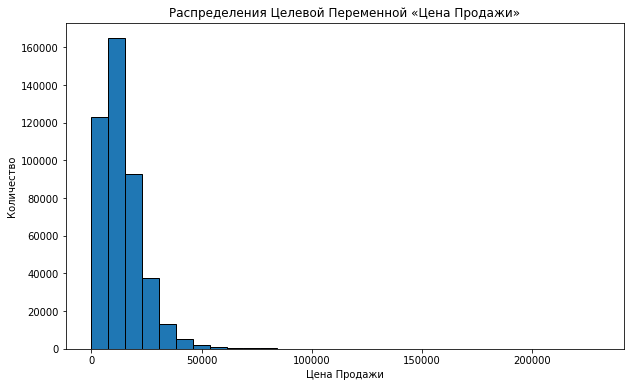

In [25]:
# Построение графика распределения целевой переменной «цена продажи»
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=30, edgecolor='black')
plt.title('Распределения Целевой Переменной «Цена Продажи»')
plt.xlabel('Цена Продажи')
plt.ylabel('Количество')
plt.show()

**Из графика видно, что с увеличением цены продажи автомобиля, уменьшается количество продаваемых авто, что довольно интуитивно!**

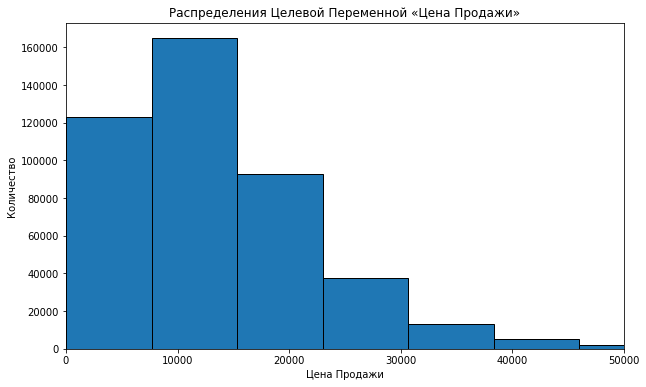

In [26]:
# Построение графика распределения целевой переменной «цена продажи»
plt.figure(figsize=(10, 6))
plt.hist(train_data['sellingprice'], bins=30, edgecolor='black')
plt.title('Распределения Целевой Переменной «Цена Продажи»')
plt.xlabel('Цена Продажи')
plt.ylabel('Количество')
plt.xlim(0, 50000)
plt.show()

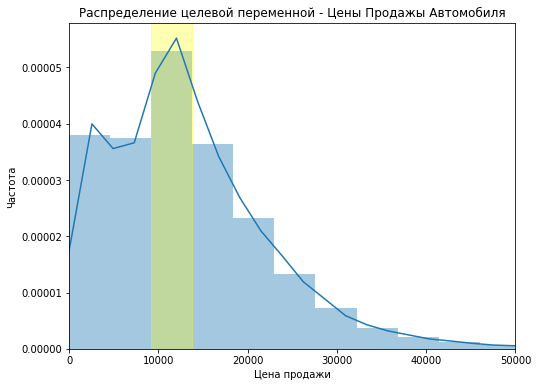

In [27]:
plt.figure(figsize=(8, 6))
sns.distplot(train_data['sellingprice'], kde=True)
plt.title('Распределение целевой переменной - Цены Продажы Автомобиля')
plt.xlabel('Цена продажи')
plt.ylabel('Частота')

# Определим диапазон для выделения и настройки масштаба по оси X.
highlight_min = 9200
highlight_max = 13800
plt.xlim(0, 50000)  # Отрегулируем масштаб оси X здесь

# Выделим диапазон, используя axvspan
plt.axvspan(highlight_min, highlight_max, color='yellow', alpha=0.3)
plt.show()

**Из графика видно, что чаще всего встречается ценовой диапазон 9200-13800**

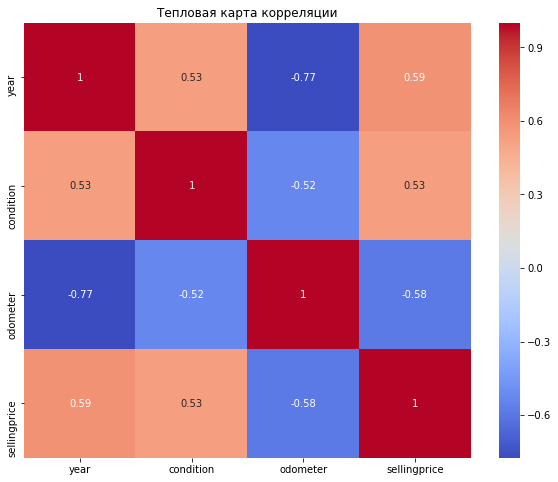

In [28]:
# Тепловая карта корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции')
plt.show()

**Сильная Положительная Корреляция:**
- sellingprice-year: судя по наблюдениям на тепловой карте, существует сильная положительная корреляция между продажной ценой и годом выпуска автомобиля, что указывает на то, что более новые автомобили обычно имеют более высокие отпускные цены.
- sellingprice-condition: также существует сильная положительная корреляция между ценой продажи и состоянием автомобилей на момент аукциона, что указывает на то, что автомобили в лучшем состоянии, как правило, имеют более высокие цены продажи. Это имеет интуитивно понятный смысл, поскольку автомобиль в хорошем состоянии, как правило, более желателен и имеет более высокую цену на рынке.

**Сильная Отрицательная Корреляция:**
- sellingprice-odometer: Кроме того, существует сильная отрицательная корреляция между продажной ценой и показаниями одометра автомобиля. Это говорит о том, что по мере увеличения показаний одометра (указывающего на увеличение пробега) цена продажи имеет тенденцию к снижению.

*Эти выводы могут помочь нам в дальнейшем анализе и моделировании. Мы можем рассмотреть включение переменных year, condition и odometer в качестве важных признаков при прогнозировании цены продажи.*

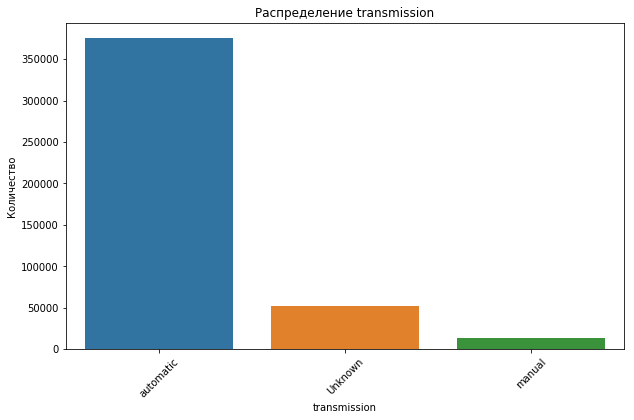

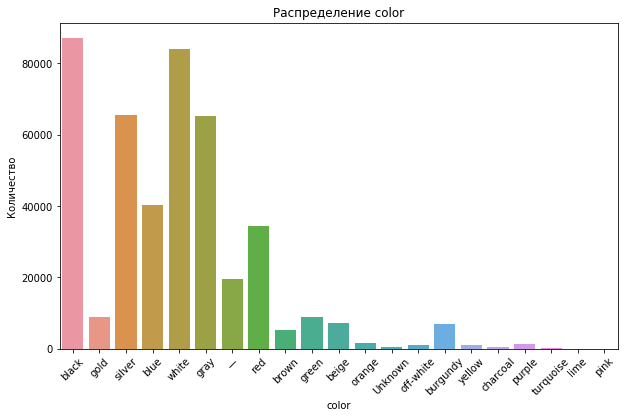

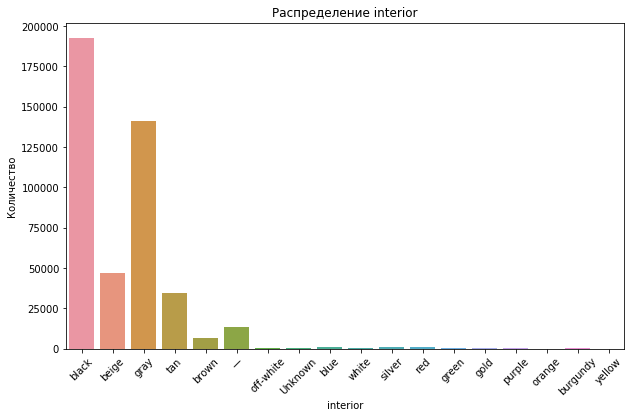

In [29]:
# Изучение категориальных переменных
categorical_cols = ['transmission', 'color', 'interior']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_data, x=col)
    plt.title(f'Распределение {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Абсолютное большинство коробок передач в данных - *автоматические трансмиссии.*
 2. Самых распространенных цветов автомобилей всего 6 в порядке убывания: *черный, белый, серебристый, серый, синий (или голубой), красный.*
 3. Самых распространенных цветов салона автомобиля всего 5 в порядке убывания: *черный, серый, бежевый, желтовато-коричневый, коричневый.*

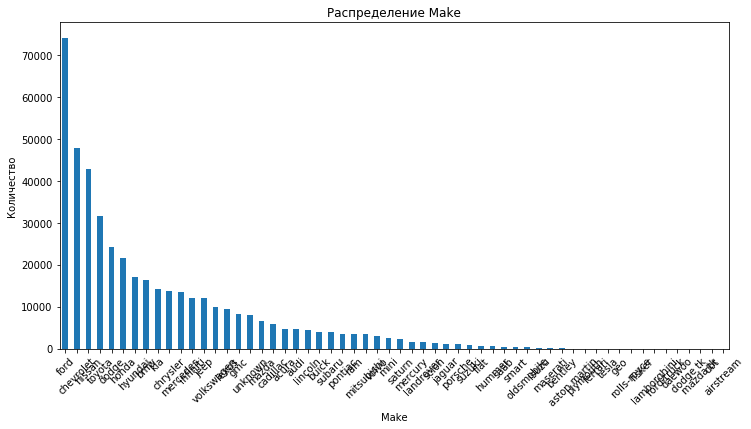

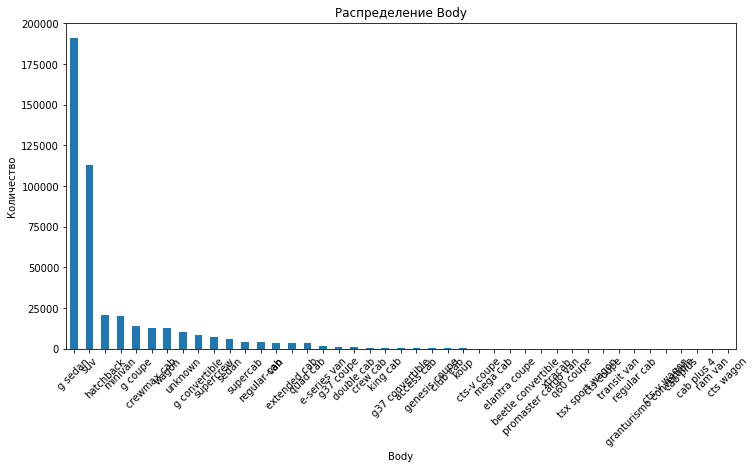

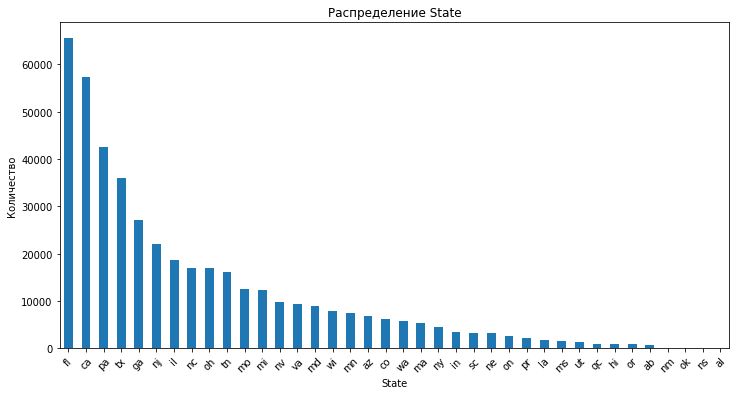

In [30]:
columns_to_visualize = ['make', 'body', 'state']

for column_name in columns_to_visualize:
    column_counts = train_data[column_name].value_counts()

    plt.figure(figsize=(12, 6))
    column_counts.plot(kind='bar')
    plt.title(f'Распределение {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.show()

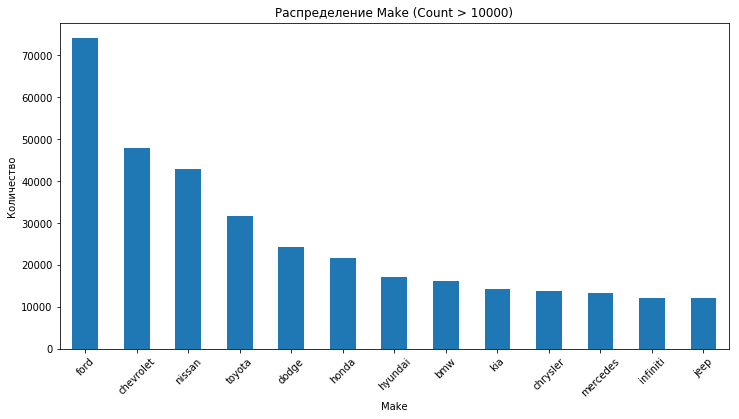

In [31]:
column_name = 'make'
count_threshold = 10000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

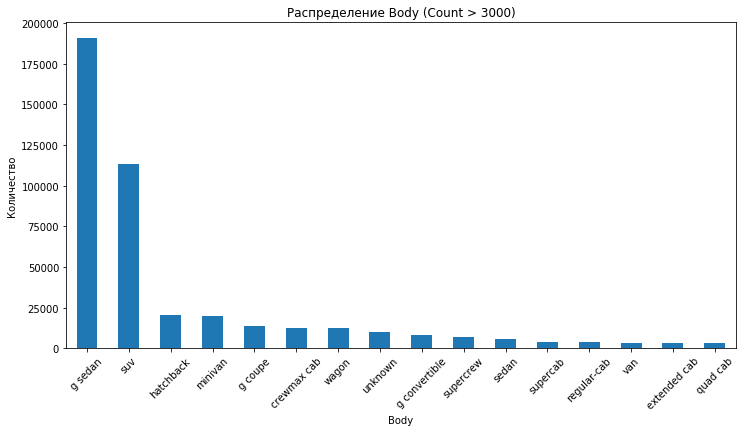

In [32]:
column_name = 'body'
count_threshold = 3000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

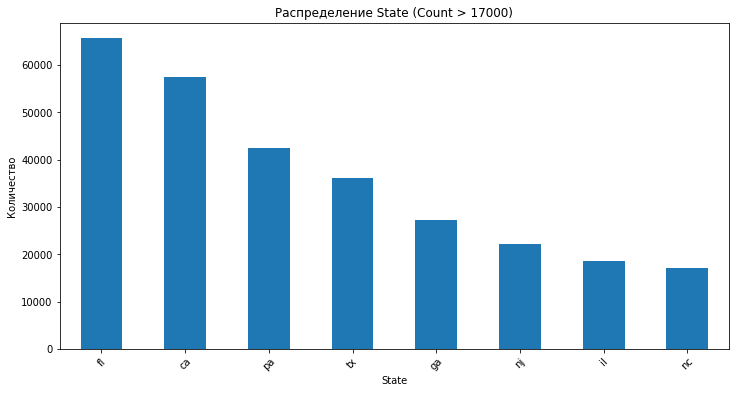

In [33]:
column_name = 'state'
count_threshold = 17000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Самые распространенные марки автомобиля в порядке убывания: *Ford, Chevrolet, Nissan, Toyota.*
 2. Самые распространенные типы кузова ТС в порядке убывания: *Sedan и SUV.*
 3. Самые распространенные штаты, в которых автомобиль выставлен на аукцион в порядке убывания: *Florida, California, Pennsylvania, Texas.*

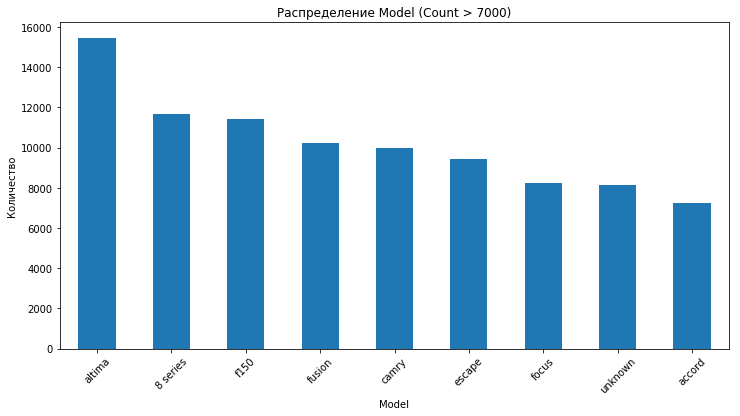

In [34]:
column_name = 'model'
count_threshold = 7000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

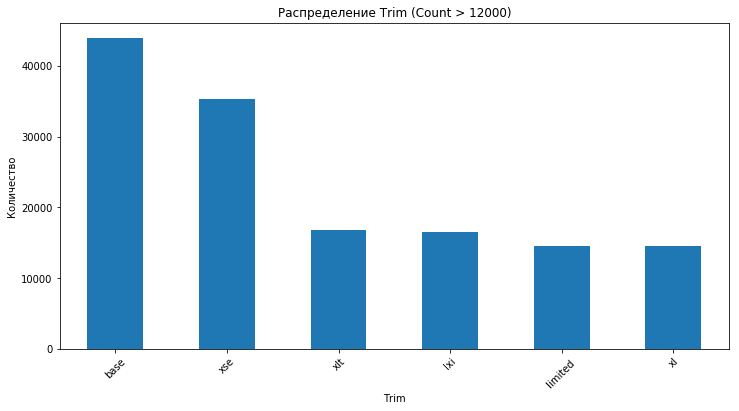

In [35]:
column_name = 'trim'
count_threshold = 12000

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

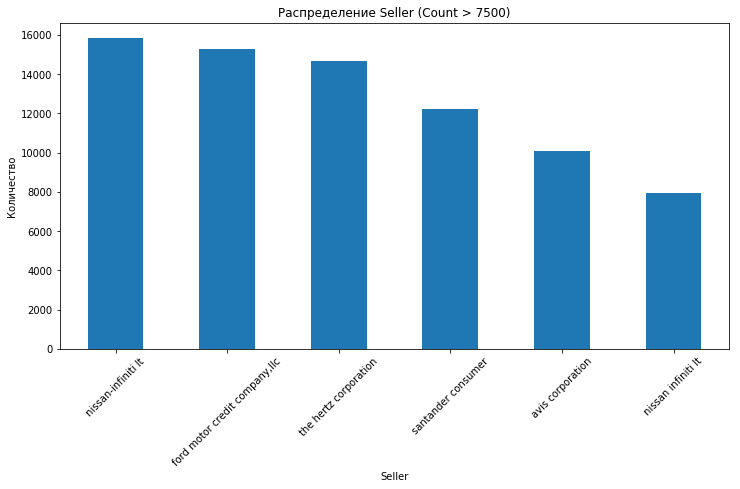

In [36]:
column_name = 'seller'
count_threshold = 7500

column_counts = train_data[column_name].value_counts()
filtered_counts = column_counts[column_counts > count_threshold]

plt.figure(figsize=(12, 6))
filtered_counts.plot(kind='bar')
plt.title(f'Распределение {column_name.capitalize()} (Count > {count_threshold})')
plt.xlabel(column_name.capitalize())
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

**Из графиков можно сделать слудующие выводы:**
 1. Самые распространенные издания автомобилей определенной марки в порядке убывания: *altima, 8 series, f150, fusion, camry, escape, focus.*
 2. Самые распространенные уровни отделки салона автомобиля в порядке убывания: *base, xse.*
 3. Самые распространенные продавцы автомобиля, автосалоны в порядке убывания: *nissan-infiniti lt, ford motor credit company,llc, the hertz corporation.*

## 4. Разработка новых синтетических признаков

In [37]:
train_data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice
0,2011,ford,edge,sl,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500
1,2014,ford,fusion,xse,g sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500
2,2012,nissan,sentra,2.0 s,g sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300
4,2007,ford,fusion,sl,g sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300


In [38]:
# Признак: Возраст автомобиля (текущий год - год выпуска)
current_year = 2023
train_data['age'] = current_year - train_data['year']
test_data['age'] = current_year - test_data['year']

# Признак: Популярные цвета автомобилей (двоичный код: обычный цвет или нет)
common_colors = ['black', 'white', 'silver', 'gray', 'blue', 'red']
train_data['is_common_color'] = train_data['color'].apply(lambda x: 1 if x.lower() in common_colors else 0)
test_data['is_common_color'] = test_data['color'].apply(lambda x: 1 if x.lower() in common_colors else 0)

# Признак: Популярные марки автомобилей (двоичный код: популярная марка или нет)
popular_brands = ['ford', 'chevrolet', 'nissan', 'toyota']
train_data['is_popular_brand'] = train_data['make'].apply(lambda x: 1 if x.lower() in popular_brands else 0)
test_data['is_popular_brand'] = test_data['make'].apply(lambda x: 1 if x.lower() in popular_brands else 0)

# Признак: Популярные уровни отделки салона автомобиля (Двоичный: популярный уровень отделки салона или нет)
popular_trims = ['base', 'xse']
train_data['is_popular_trim'] = train_data['trim'].apply(lambda x: 1 if x.lower() in popular_trims else 0)
test_data['is_popular_trim'] = test_data['trim'].apply(lambda x: 1 if x.lower() in popular_trims else 0)

# Признак: пробег за год
train_data['mileage_per_year'] = train_data['odometer'] / train_data['age']
test_data['mileage_per_year'] = test_data['odometer'] / test_data['age']

# Признак: Разделение возраста автомобиля на категории
bin_boundaries = [0, 5, 10, np.inf]
bin_labels = ['0-5', '6-10', '11+']
train_data['age_bin'] = pd.cut(train_data['age'], bins=bin_boundaries, labels=bin_labels, right=False)
test_data['age_bin'] = pd.cut(test_data['age'], bins=bin_boundaries, labels=bin_labels, right=False)

# Признак: взаимодействие между возрастом авто и пробегом
train_data['age_mileage_interaction'] = train_data['age'] * train_data['odometer']
test_data['age_mileage_interaction'] = test_data['age'] * test_data['odometer']

# Признак: логарифм показаний одометра
train_data['odometer_log'] = np.log(train_data['odometer'])
test_data['odometer_log'] = np.log(test_data['odometer'])

# Признак: разные уровни пробега
bins = [0, 50000, 100000, 150000, 200000, np.inf]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '>200k']
train_data['odometer_bin'] = pd.cut(train_data['odometer'], bins=bins, labels=labels)
test_data['odometer_bin'] = pd.cut(test_data['odometer'], bins=bins, labels=labels)

# Признак: отличие одометра от среднего
make_average_odometer = train_data.groupby('make')['odometer'].transform('mean')
train_data['odometer_difference_from_average'] = train_data['odometer'] - make_average_odometer
test_data['odometer_difference_from_average'] = test_data['odometer'] - make_average_odometer.mean()

In [39]:
print(train_data.head(2))

   year  make   model trim     body transmission                vin state  \
0  2011  ford    edge   sl      suv    automatic  2fmdk3jc4bba41556    md   
1  2014  ford  fusion  xse  g sedan    automatic  3fa6p0h75er208976    mo   

   condition  odometer  ... age is_common_color is_popular_brand  \
0        4.2  111041.0  ...  12               1                1   
1        3.5   31034.0  ...   9               1                1   

   is_popular_trim  mileage_per_year  age_bin  age_mileage_interaction  \
0                0       9253.416667      11+                1332492.0   
1                1       3448.222222     6-10                 279306.0   

   odometer_log  odometer_bin odometer_difference_from_average  
0     11.617655     100k-150k                     47104.787625  
1     10.342839          <50k                    -32902.212375  

[2 rows x 24 columns]


In [40]:
print(test_data.head(2))

   year      make         model    trim     body transmission  \
0  2005  cadillac           cts    base  g sedan    automatic   
1  2014       gmc  savana cargo  2500 s      van      Unknown   

                 vin state  condition  odometer  ... age is_common_color  \
0  1g6dp567450124779    ca        2.7  116970.0  ...  18               1   
1  1gtw7fca7e1902207    pa        4.4    6286.0  ...   9               1   

  is_popular_brand  is_popular_trim  mileage_per_year  age_bin  \
0                0                1       6498.333333      11+   
1                0                0        698.444444     6-10   

   age_mileage_interaction  odometer_log odometer_bin  \
0                2105460.0     11.669673    100k-150k   
1                  56574.0      8.746080         <50k   

   odometer_difference_from_average  
0                      48628.124765  
1                     -62055.875235  

[2 rows x 23 columns]


In [41]:
print(train_data.info())
print()
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 24 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   year                              440236 non-null  int64   
 1   make                              440236 non-null  object  
 2   model                             440236 non-null  object  
 3   trim                              440236 non-null  object  
 4   body                              440236 non-null  object  
 5   transmission                      440236 non-null  object  
 6   vin                               440236 non-null  object  
 7   state                             440236 non-null  object  
 8   condition                         440236 non-null  float64 
 9   odometer                          440236 non-null  float64 
 10  color                             440236 non-null  object  
 11  interior                          44023

## 5. Проверка на мультиколлинеарность

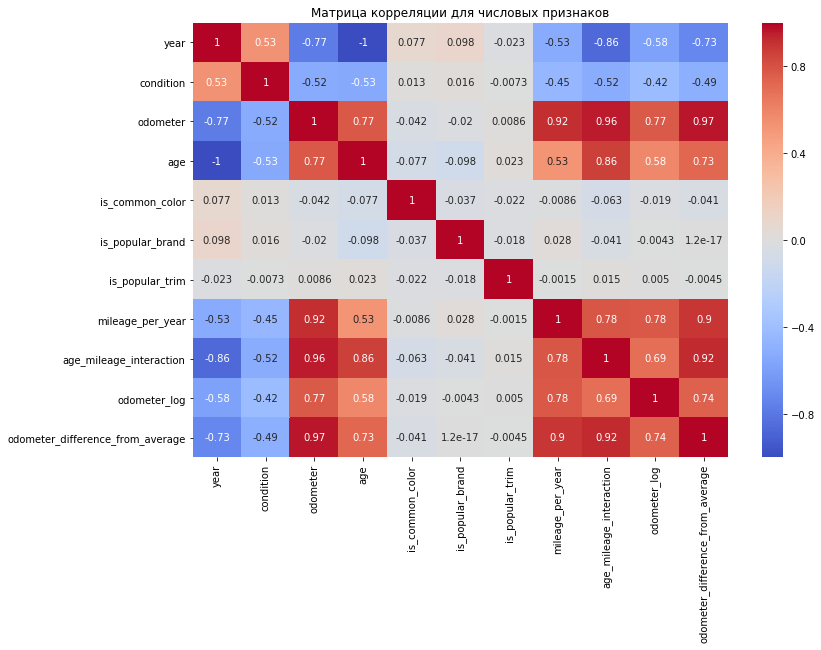

In [42]:
# Выберем числовые признаки для проверки на мультиколлинеарность
numerical_features = ['year', 'condition', 'odometer', 'age', 'is_common_color', 'is_popular_brand',
                      'is_popular_trim', 'mileage_per_year', 'age_mileage_interaction',
                      'odometer_log', 'odometer_difference_from_average']

# Создадим корреляционную матрицу для числовых признаков
corr_matrix = train_data[numerical_features].corr()

# Построим корреляционную матрицу
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции для числовых признаков')
plt.show()

*Исходя из матрицы корреляции, можно сделать следующие вывод: 

1. можно убрать признак **year** и оставить только **age**.*
2. можно убрать признаки 'age_mileage_interaction', 'mileage_per_year' и 'odometer_difference_from_average' из-за их высокой корреляции с признаком **odometer**, который является крайне выжным для обучения

## 6. Отбор финального набора обучающих признаков

In [43]:
# Выберем признаки для обучения
training_features = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'odometer',
                     'color', 'interior', 'seller', 'age', 'is_common_color', 'is_popular_brand', 'is_popular_trim',
                     'age_bin', 'odometer_log', 'odometer_bin']

# Создадим X (обучающие признакми) и y (целевая переменная)
X = train_data[training_features]
y = train_data['sellingprice']

# Выполнение ordinal кодирования для категориальных переменных
categorical_variables = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller', 
                         'age_bin', 'odometer_bin']

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_encoded = ordinal_encoder.fit_transform(X[categorical_variables])
X[categorical_variables] = X_encoded

# Разделим train_data на обучающие и проверочные наборы
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверим разменость наборов для обучения и проверки
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

E:\Apps\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Training set shape: (352188, 18) (352188,)
Validation set shape: (88048, 18) (88048,)


## 7. Выбор и обучение моделей

In [44]:
# Инициализируем модели
linear_regression = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)

# Обучим модели
linear_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Предсказания на проверочном наборе
linear_regression_preds = linear_regression.predict(X_val)
random_forest_preds = random_forest.predict(X_val)

# Расчет MAPE (средняя абсолютная ошибка в процентах) для моделей
linear_regression_mape = mean_absolute_percentage_error(y_val, linear_regression_preds)
random_forest_mape = mean_absolute_percentage_error(y_val, random_forest_preds)

# Распечатаем MAPE для каждой модели
print("MAPE для Линейной Регрессии: {:.2f}".format(linear_regression_mape))
print("MAPE для Регрессора Случайного Леса: {:.2f}".format(random_forest_mape))

MAPE для Линейной Регрессии: 0.65
MAPE для Регрессора Случайного Леса: 0.19


## 8. Итоговая оценка качества предсказания лучшей модели

In [45]:
X_test = test_data[training_features]

X_test_encoded = ordinal_encoder.transform(X_test[categorical_variables])
X_test[categorical_variables] = X_test_encoded

test_preds = random_forest.predict(X_test)
test_preds

E:\Apps\Anaconda\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


array([ 4255.5, 22672. , 19183.5, ...,  4438. , 19423.5, 15407. ])

In [48]:
# Создадим DataFrame со столбцами vin и спрогнозированной цены продажи
submission_df = pd.DataFrame({
    'vin': test_data['vin'],  
    'sellingprice': test_preds
})

# Сохраним DataFrame в виде CSV-файла.
submission_df.to_csv('submission.csv', index=False)

## 9. Анализ важности ее признаков.

Feature Importances:
             Feature  Importance
7           odometer    0.192171
16      odometer_log    0.174406
3               body    0.125978
0               make    0.117629
1              model    0.100777
11               age    0.092410
2               trim    0.085745
6          condition    0.047408
10            seller    0.018641
13  is_popular_brand    0.016361
14   is_popular_trim    0.006732
5              state    0.006299
8              color    0.004715
15           age_bin    0.004131
9           interior    0.003577
4       transmission    0.002013
12   is_common_color    0.000829
17      odometer_bin    0.000177


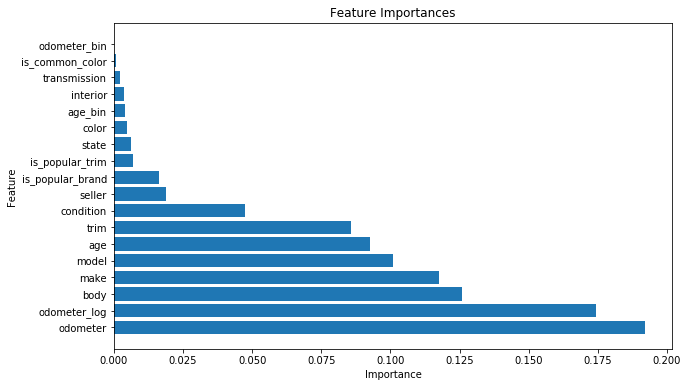

In [49]:
# Получение важности признаков
importances = random_forest.feature_importances_

# Создадим датафрейм для хранения важности признаков
feature_importances = pd.DataFrame({'Feature': training_features, 'Importance': importances})

# Отсортируем признаки по важности в порядке убывания
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Распечатаем важность признаков
print("Feature Importances:")
print(feature_importances)

# Построение графика важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Web-приложения прототип модели на библиотеке Streamlit